In [107]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [108]:
pd.set_option('display.max_columns', None)  # 顯示所有列

In [109]:
df = pd.read_csv("chained_data(把time欄位給drop掉就可以用了).csv")

In [110]:
df['time'] = pd.to_datetime(df['time'])
df = df.rename(columns={
    "tot": "總停車格",
    "sbi": "目前車輛數量",
    "bemp": "空位數量",
    "act": "全站禁用狀態"
})

In [111]:
#把時間資訊變成欄位
df['日期'] = df['time'].dt.day
df['Weekday'] = df['time'].dt.weekday
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df['第幾周'] = df['time'].dt.strftime('%V')

# Mapping weekdays from numerical values to abbreviations
weekday_mapping = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['星期'] = df['Weekday'].map(weekday_mapping)

In [112]:
df.head()

,time,總停車格,目前車輛數量,空位數量,全站禁用狀態,進站人數,出站人數,全天空日射量(MJ/㎡),最大瞬間風(m/s),最大瞬間風風向(360degree),氣溫(℃),海平面氣壓(hPa),測站氣壓(hPa),相對溼度(%),紫外線指數,降水時數(h),降水量(mm),露點溫度(℃),風向(360degree),風速(m/s),去年借車數,去年還車數,is_holiday,is_hightraffic,公館2號,公館3號,公館1號,公館4號,weekday_sin,weekday_cos,time_sin,time_cos,日期,Weekday,hour,minute,第幾周,星期
0,2023-10-02 00:00:00,12.0,0.0,12.0,1.0,42.0,21.0,0.0,4.7,90.0,26.5,1012.8,1009.3,83.0,0.0,0.0,0.0,23.4,130.0,2.0,0.333333,0.166667,0,0,0,0,1,0,0.0,1.0,0.000000,1.000000,2,0,0,0,40,Mon
1,2023-10-02 00:10:00,12.0,0.0,12.0,1.0,1.0,0.0,0.0,4.7,90.0,26.5,1012.8,1009.3,83.0,0.0,0.0,0.0,23.4,130.0,2.0,0.333333,0.166667,0,0,0,0,1,0,0.0,1.0,0.021815,0.999762,2,0,0,10,40,Mon
2,2023-10-02 00:20:00,12.0,0.0,12.0,1.0,1.0,0.0,0.0,4.7,90.0,26.5,1012.8,1009.3,83.0,0.0,0.0,0.0,23.4,130.0,2.0,0.333333,0.166667,0,0,0,0,1,0,0.0,1.0,0.043619,0.999048,2,0,0,20,40,Mon
3,2023-10-02 00:30:00,12.0,0.0,12.0,1.0,1.0,0.0,0.0,4.7,90.0,26.5,1012.8,1009.3,83.0,0.0,0.0,0.0,23.4,130.0,2.0,0.333333,0.166667,0,0,0,0,1,0,0.0,1.0,0.065403,0.997859,2,0,0,30,40,Mon
4,2023-10-02 00:40:00,12.0,0.0,12.0,1.0,1.0,0.0,0.0,4.7,90.0,26.5,1012.8,1009.3,83.0,0.0,0.0,0.0,23.4,130.0,2.0,0.333333,0.166667,0,0,0,0,1,0,0.0,1.0,0.087156,0.996195,2,0,0,40,40,Mon


----

### 十月份資料
- 缺少： **<font color = orange>1、12、13、14、21、22、23、24</font>**

In [113]:
df.isnull().sum()

time                     0
總停車格                  4672
目前車輛數量                4672
空位數量                  4672
全站禁用狀態                4672
進站人數                    20
出站人數                    20
全天空日射量(MJ/㎡)             0
最大瞬間風(m/s)               0
最大瞬間風風向(360degree)       0
氣溫(℃)                    0
海平面氣壓(hPa)               0
測站氣壓(hPa)                0
相對溼度(%)                  0
紫外線指數                    0
降水時數(h)                  0
降水量(mm)               1272
露點溫度(℃)                  0
風向(360degree)           24
風速(m/s)                  0
去年借車數                    0
去年還車數                    0
is_holiday               0
is_hightraffic           0
公館2號                     0
公館3號                     0
公館1號                     0
公館4號                     0
weekday_sin              0
weekday_cos              0
time_sin                 0
time_cos                 0
日期                       0
Weekday                  0
hour                     0
minute                   0
第幾周                      0
星

先都補0

In [114]:
# df_filter = df.dropna(subset=['目前車輛數量'])
df_filter = df.copy()
df_filter['目前車輛數量'] = df_filter['目前車輛數量'].fillna(0)
df_filter['日期'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [116]:
df_filter['day_datetime'] = df_filter['hour'].astype(str) + ':' + df_filter['minute'].astype(str)
df_filter['week_datetime'] = df_filter['Weekday'].astype(str) + '-' + df_filter['hour'].astype(str) + '-' + df_filter['minute'].astype(str)
df_filter

,time,總停車格,目前車輛數量,空位數量,全站禁用狀態,進站人數,出站人數,全天空日射量(MJ/㎡),最大瞬間風(m/s),最大瞬間風風向(360degree),氣溫(℃),海平面氣壓(hPa),測站氣壓(hPa),相對溼度(%),紫外線指數,降水時數(h),降水量(mm),露點溫度(℃),風向(360degree),風速(m/s),去年借車數,去年還車數,is_holiday,is_hightraffic,公館2號,公館3號,公館1號,公館4號,weekday_sin,weekday_cos,time_sin,time_cos,日期,Weekday,hour,minute,第幾周,星期,day_datetime,week_datetime
0,2023-10-02 00:00:00,12.0,0.0,12.0,1.0,42.0,21.0,0.0,4.7,90.0,26.5,1012.8,1009.3,83.0,0.0,0.0,0.0,23.4,130.0,2.0,0.333333,0.166667,0,0,0,0,1,0,0.000000,1.000000,0.000000,1.000000,2,0,0,0,40,Mon,0:0,0-0-0
1,2023-10-02 00:10:00,12.0,0.0,12.0,1.0,1.0,0.0,0.0,4.7,90.0,26.5,1012.8,1009.3,83.0,0.0,0.0,0.0,23.4,130.0,2.0,0.333333,0.166667,0,0,0,0,1,0,0.000000,1.000000,0.021815,0.999762,2,0,0,10,40,Mon,0:10,0-0-10
2,2023-10-02 00:20:00,12.0,0.0,12.0,1.0,1.0,0.0,0.0,4.7,90.0,26.5,1012.8,1009.3,83.0,0.0,0.0,0.0,23.4,130.0,2.0,0.333333,0.166667,0,0,0,0,1,0,0.000000,1.000000,0.043619,0.999048,2,0,0,20,40,Mon,0:20,0-0-20
3,2023-10-02 00:30:00,12.0,0.0,12.0,1.0,1.0,0.0,0.0,4.7,90.0,26.5,1012.8,1009.3,83.0,0.0,0.0,0.0,23.4,130.0,2.0,0.333333,0.166667,0,0,0,0,1,0,0.000000,1.000000,0.065403,0.997859,2,0,0,30,40,Mon,0:30,0-0-30
4,2023-10-02 00:40:00,12.0,0.0,12.0,1.0,1.0,0.0,0.0,4.7,90.0,26.5,1012.8,1009.3,83.0,0.0,0.0,0.0,23.4,130.0,2.0,0.333333,0.166667,0,0,0,0,1,0,0.000000,1.000000,0.087156,0.996195,2,0,0,40,40,Mon,0:40,0-0-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17275,2023-10-31 23:10:00,12.0,2.0,10.0,1.0,NaN,NaN,0.0,9.2,100.0,22.2,1020.4,1016.8,94.0,0.0,0.1,NaN,21.2,90.0,2.8,0.166667,0.000000,0,0,0,0,0,1,0.433884,0.900969,0.108867,-0.994056,31,1,23,10,44,Tues,23:10,1-23-10
17276,2023-10-31 23:20:00,12.0,1.0,11.0,1.0,NaN,NaN,0.0,9.2,100.0,22.2,1020.4,1016.8,94.0,0.0,0.1,NaN,21.2,90.0,2.8,0.166667,0.000000,0,0,0,0,0,1,0.433884,0.900969,0.087156,-0.996195,31,1,23,20,44,Tues,23:20,1-23-20
17277,2023-10-31 23:30:00,12.0,0.0,12.0,1.0,NaN,NaN,0.0,9.2,100.0,22.2,1020.4,1016.8,94.0,0.0,0.1,NaN,21.2,90.0,2.8,0.166667,0.000000,0,0,0,0,0,1,0.433884,0.900969,0.065403,-0.997859,31,1,23,30,44,Tues,23:30,1-23-30
17278,2023-10-31 23:40:00,12.0,0.0,12.0,1.0,NaN,NaN,0.0,9.2,100.0,22.2,1020.4,1016.8,94.0,0.0,0.1,NaN,21.2,90.0,2.8,0.166667,0.000000,0,0,0,0,0,1,0.433884,0.900969,0.043619,-0.999048,31,1,23,40,44,Tues,23:40,1-23-40


In [117]:
guan_1 = df_filter[df_filter['公館1號'] == 1]
guan_2 = df_filter[df_filter['公館2號'] == 1]
guan_3 = df_filter[df_filter['公館3號'] == 1]
guan_4 = df_filter[df_filter['公館4號'] == 1]

In [157]:
print(guan_1.shape)
print(guan_2.shape)
print(guan_3.shape)
print(guan_4.shape)

(4320, 40)
(4320, 40)
(4320, 40)
(4320, 40)


## EDA

要畫哪一個出口

In [147]:
# picture = guan_1
picture = guan_2
# picture = guan_3
# picture = guan_4

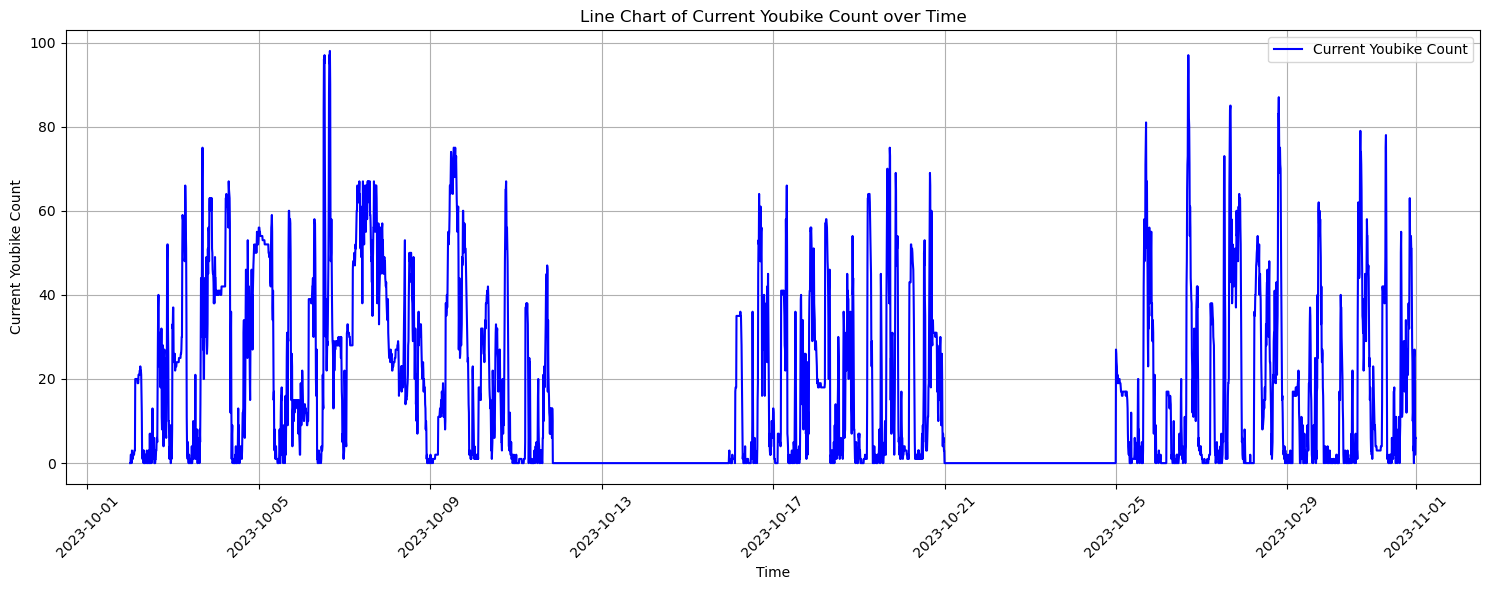

In [149]:
# Plotting the line graph for current vehicle count over time
plt.figure(figsize=(15, 6))
plt.plot(picture['time'], picture['目前車輛數量'], label='Current Youbike Count', color='blue')
plt.xlabel('Time')
plt.ylabel('Current Youbike Count')
plt.title('Line Chart of Current Youbike Count over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Section 1：看每周的變化趨勢是否會相同(借車數量)

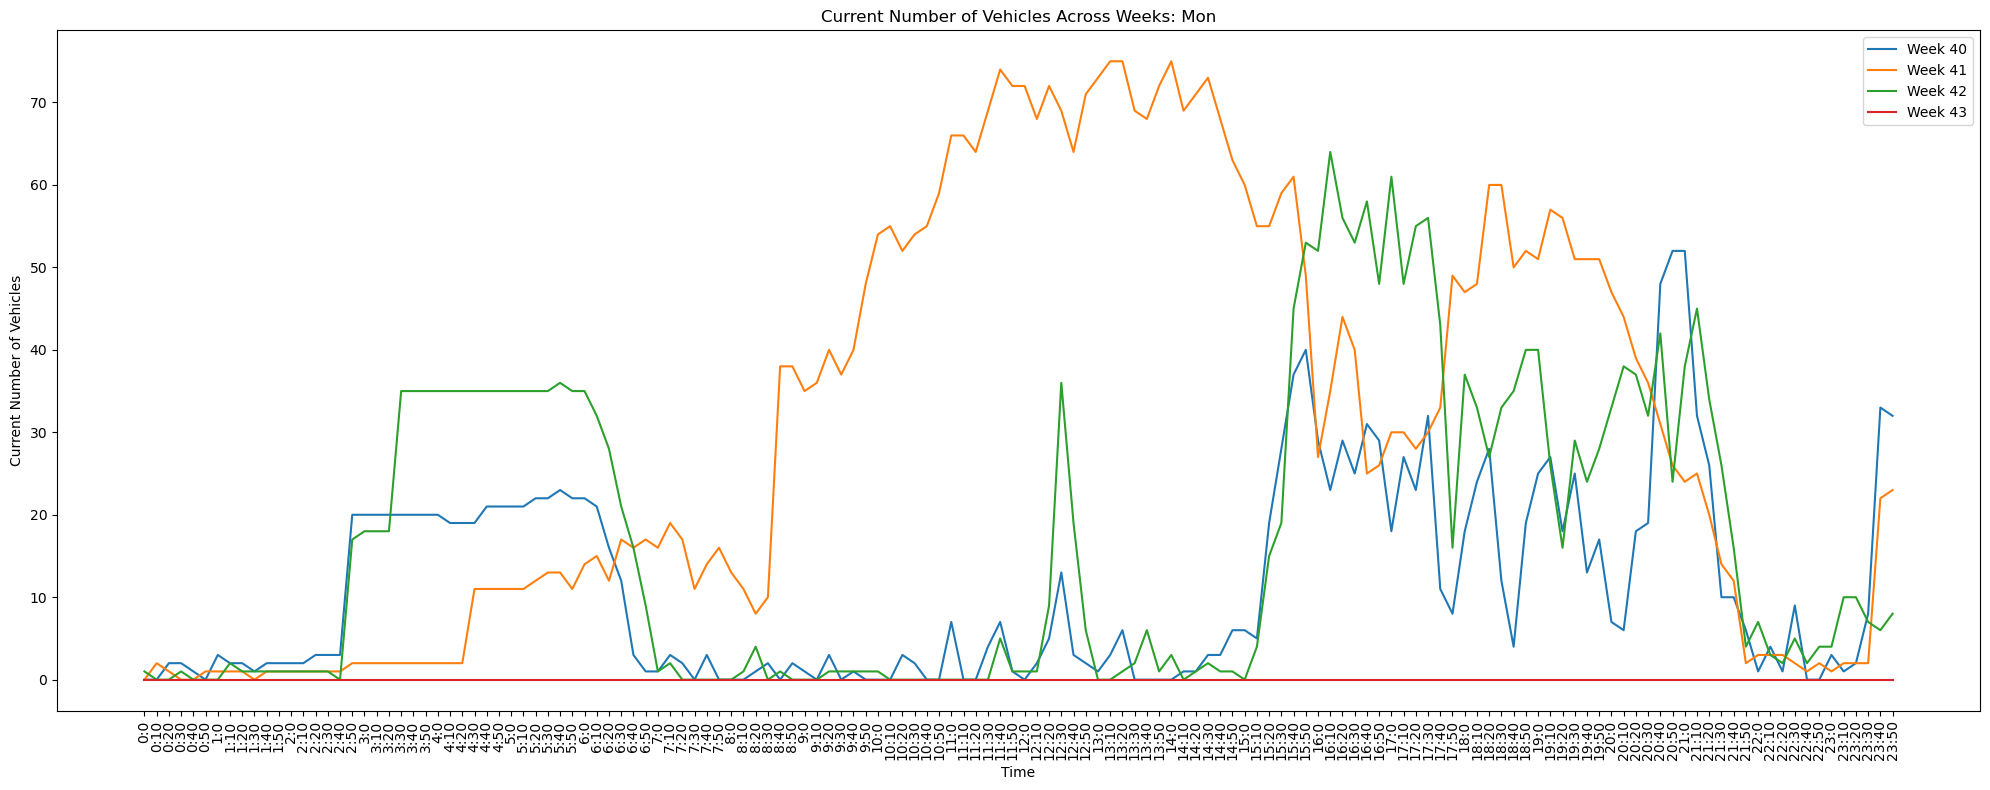

In [150]:
import matplotlib.pyplot as plt

weekday = 'Mon'

weeks = ['40', '41', '42', '43']
filtered_data = picture[picture['第幾周'].isin(weeks)]
filtered_data = filtered_data[filtered_data['星期']==weekday]

# Plotting
plt.figure(figsize=(20, 8))
for week in weeks:
    weekly_data = filtered_data[filtered_data['第幾周'] == week]
    plt.plot(weekly_data['day_datetime'], weekly_data['目前車輛數量'], label=f'Week {week}')

plt.xlabel('Time')
plt.ylabel('Current Number of Vehicles')
plt.title(f'Current Number of Vehicles Across Weeks: {weekday}')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

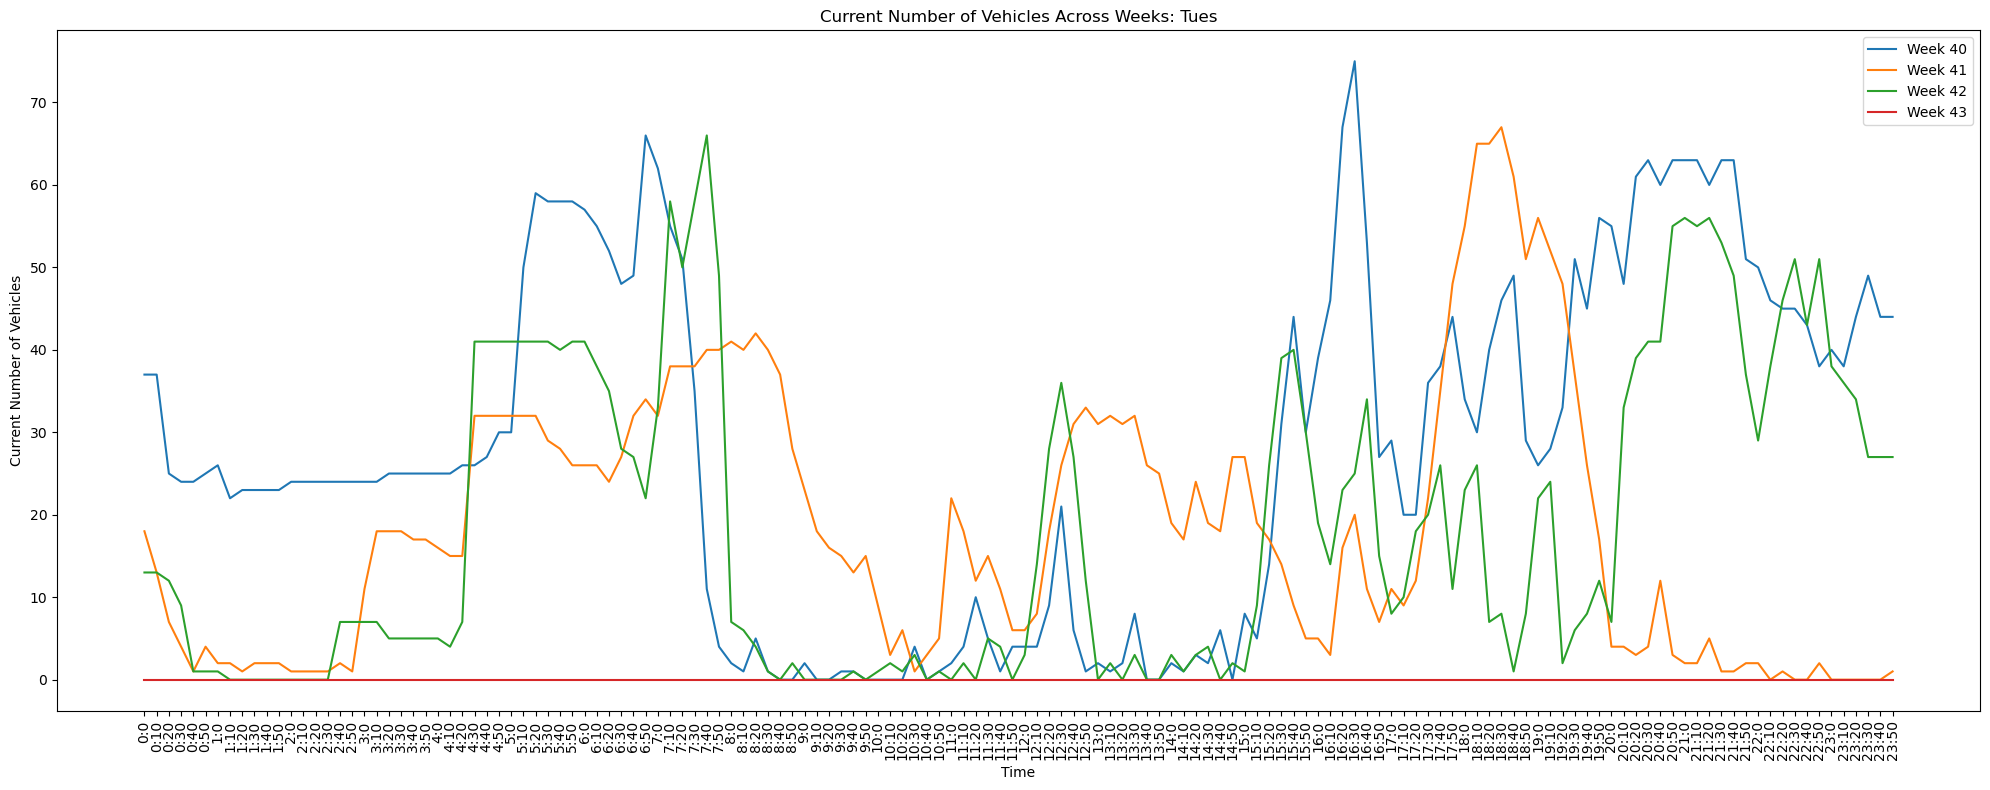

In [151]:
import matplotlib.pyplot as plt

weekday = 'Tues'

weeks = ['40', '41', '42', '43']
filtered_data = picture[picture['第幾周'].isin(weeks)]
filtered_data = filtered_data[filtered_data['星期']==weekday]

# Plotting
plt.figure(figsize=(20, 8))
for week in weeks:
    weekly_data = filtered_data[filtered_data['第幾周'] == week]
    plt.plot(weekly_data['day_datetime'], weekly_data['目前車輛數量'], label=f'Week {week}')

plt.xlabel('Time')
plt.ylabel('Current Number of Vehicles')
plt.title(f'Current Number of Vehicles Across Weeks: {weekday}')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

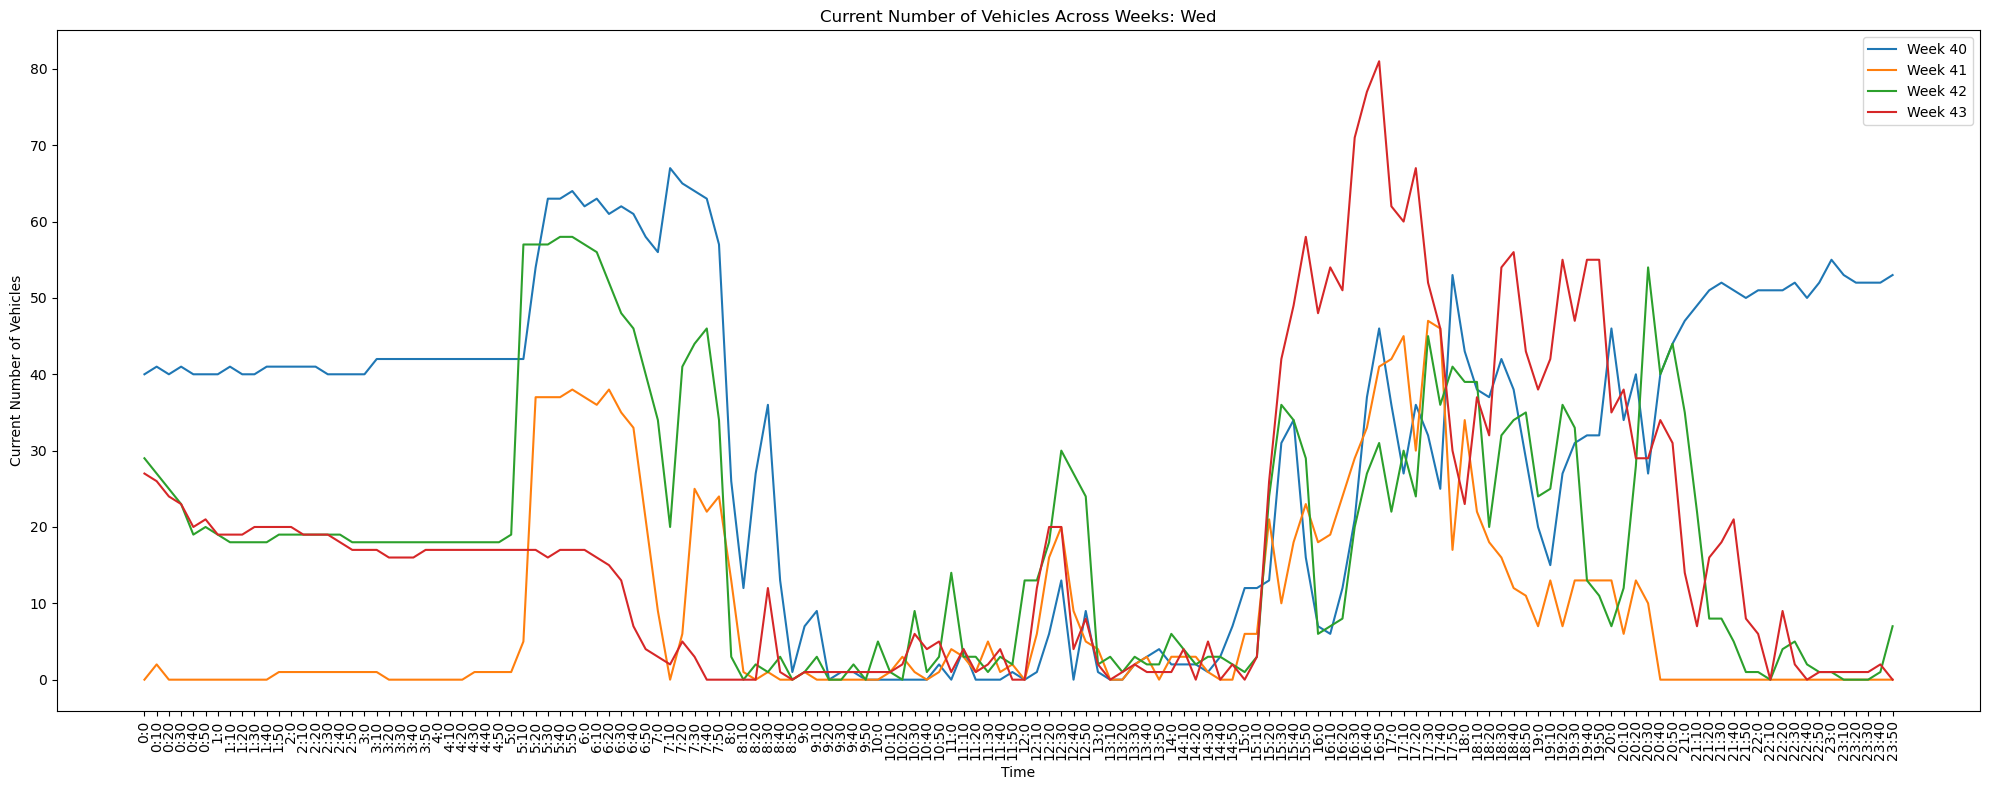

In [152]:
import matplotlib.pyplot as plt

weekday = 'Wed'

weeks = ['40', '41', '42', '43']
filtered_data = picture[picture['第幾周'].isin(weeks)]
filtered_data = filtered_data[filtered_data['星期']==weekday]

# Plotting
plt.figure(figsize=(20, 8))
for week in weeks:
    weekly_data = filtered_data[filtered_data['第幾周'] == week]
    plt.plot(weekly_data['day_datetime'], weekly_data['目前車輛數量'], label=f'Week {week}')

plt.xlabel('Time')
plt.ylabel('Current Number of Vehicles')
plt.title(f'Current Number of Vehicles Across Weeks: {weekday}')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

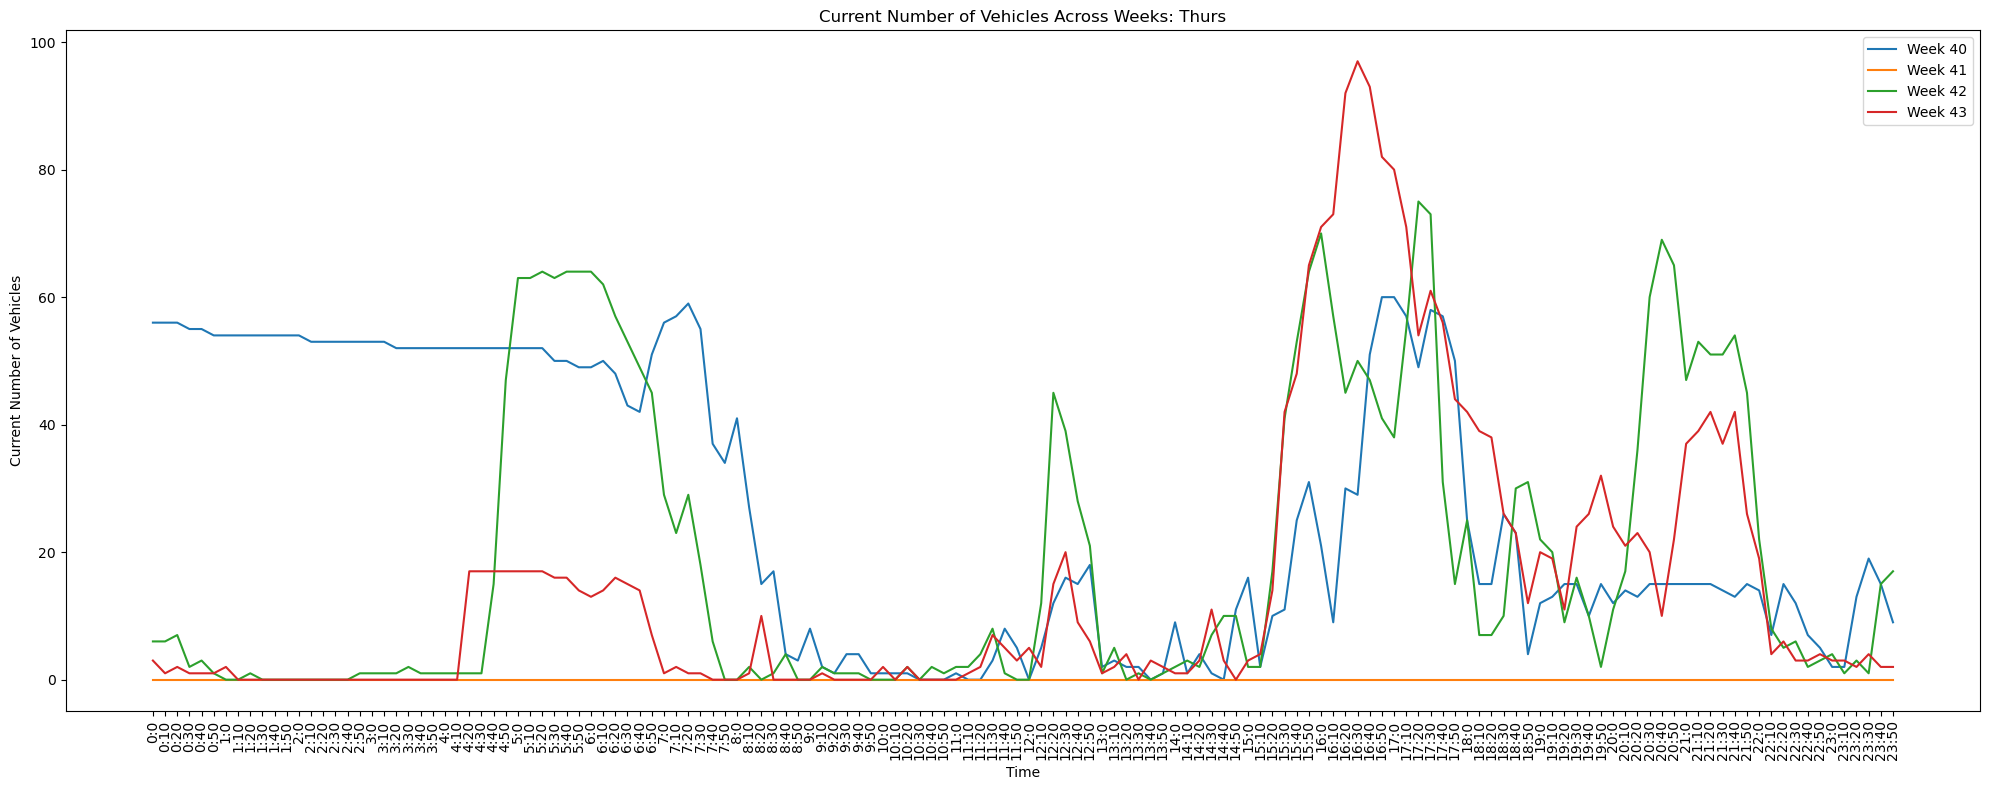

In [153]:
import matplotlib.pyplot as plt

weekday = 'Thurs'

weeks = ['40', '41', '42', '43']
filtered_data = picture[picture['第幾周'].isin(weeks)]
filtered_data = filtered_data[filtered_data['星期']==weekday]

# Plotting
plt.figure(figsize=(20, 8))
for week in weeks:
    weekly_data = filtered_data[filtered_data['第幾周'] == week]
    plt.plot(weekly_data['day_datetime'], weekly_data['目前車輛數量'], label=f'Week {week}')

plt.xlabel('Time')
plt.ylabel('Current Number of Vehicles')
plt.title(f'Current Number of Vehicles Across Weeks: {weekday}')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

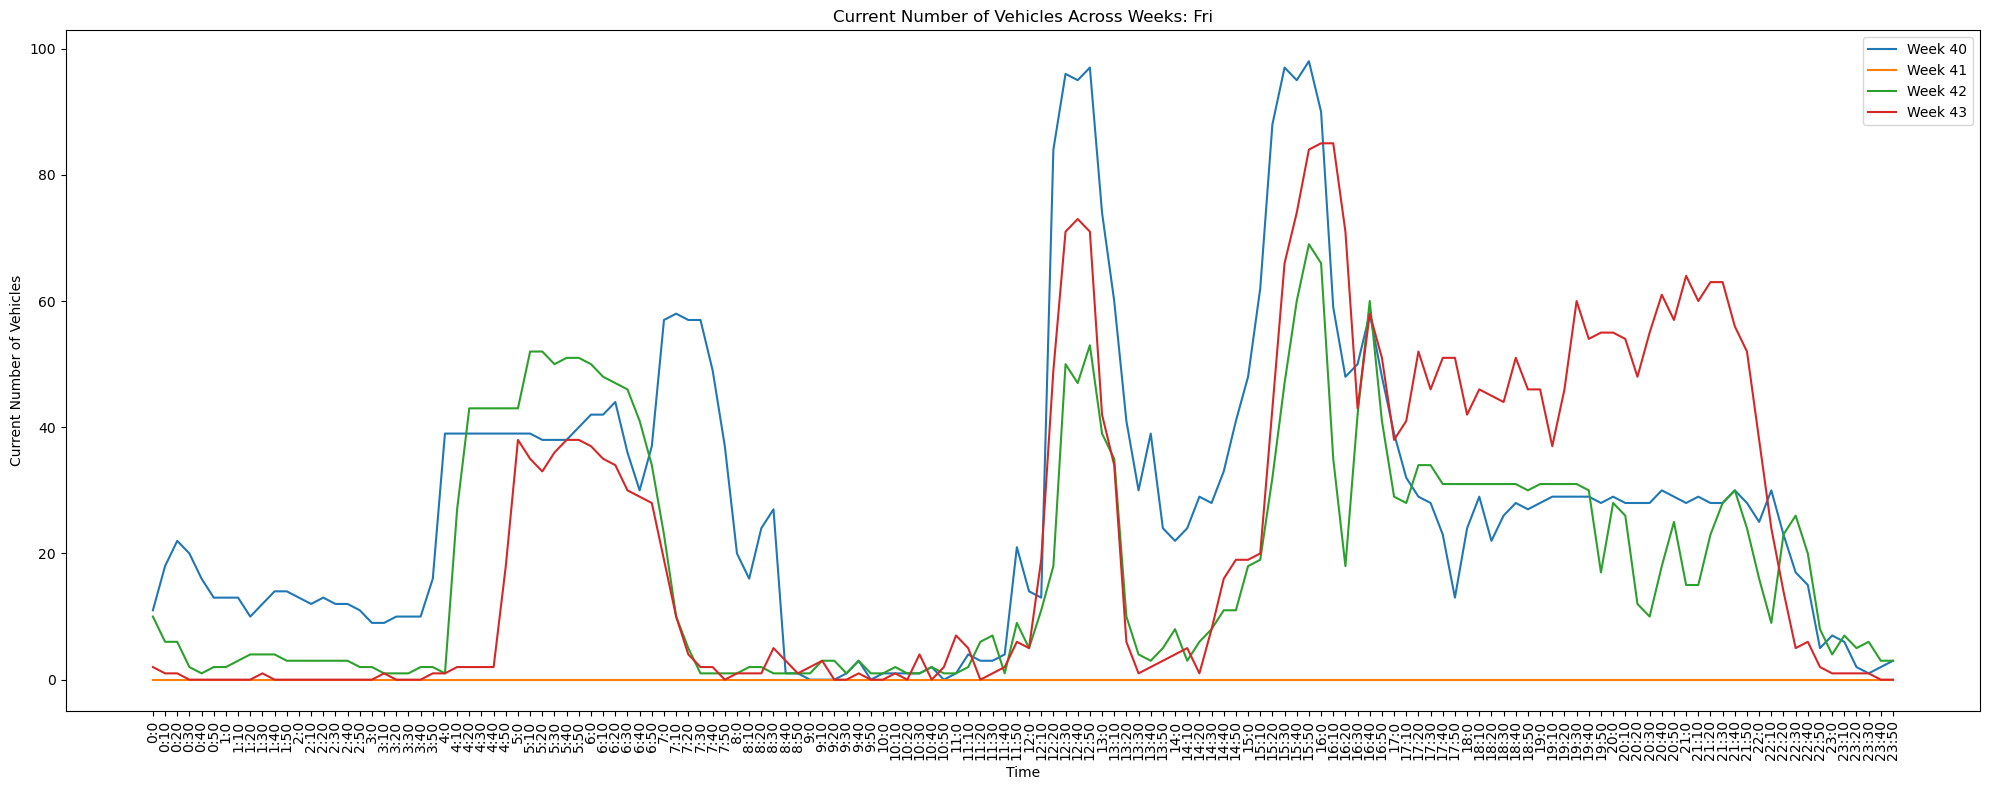

In [154]:
import matplotlib.pyplot as plt

weekday = 'Fri'

weeks = ['40', '41', '42', '43']
filtered_data = picture[picture['第幾周'].isin(weeks)]
filtered_data = filtered_data[filtered_data['星期']==weekday]

# Plotting
plt.figure(figsize=(20, 8))
for week in weeks:
    weekly_data = filtered_data[filtered_data['第幾周'] == week]
    plt.plot(weekly_data['day_datetime'], weekly_data['目前車輛數量'], label=f'Week {week}')

plt.xlabel('Time')
plt.ylabel('Current Number of Vehicles')
plt.title(f'Current Number of Vehicles Across Weeks: {weekday}')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

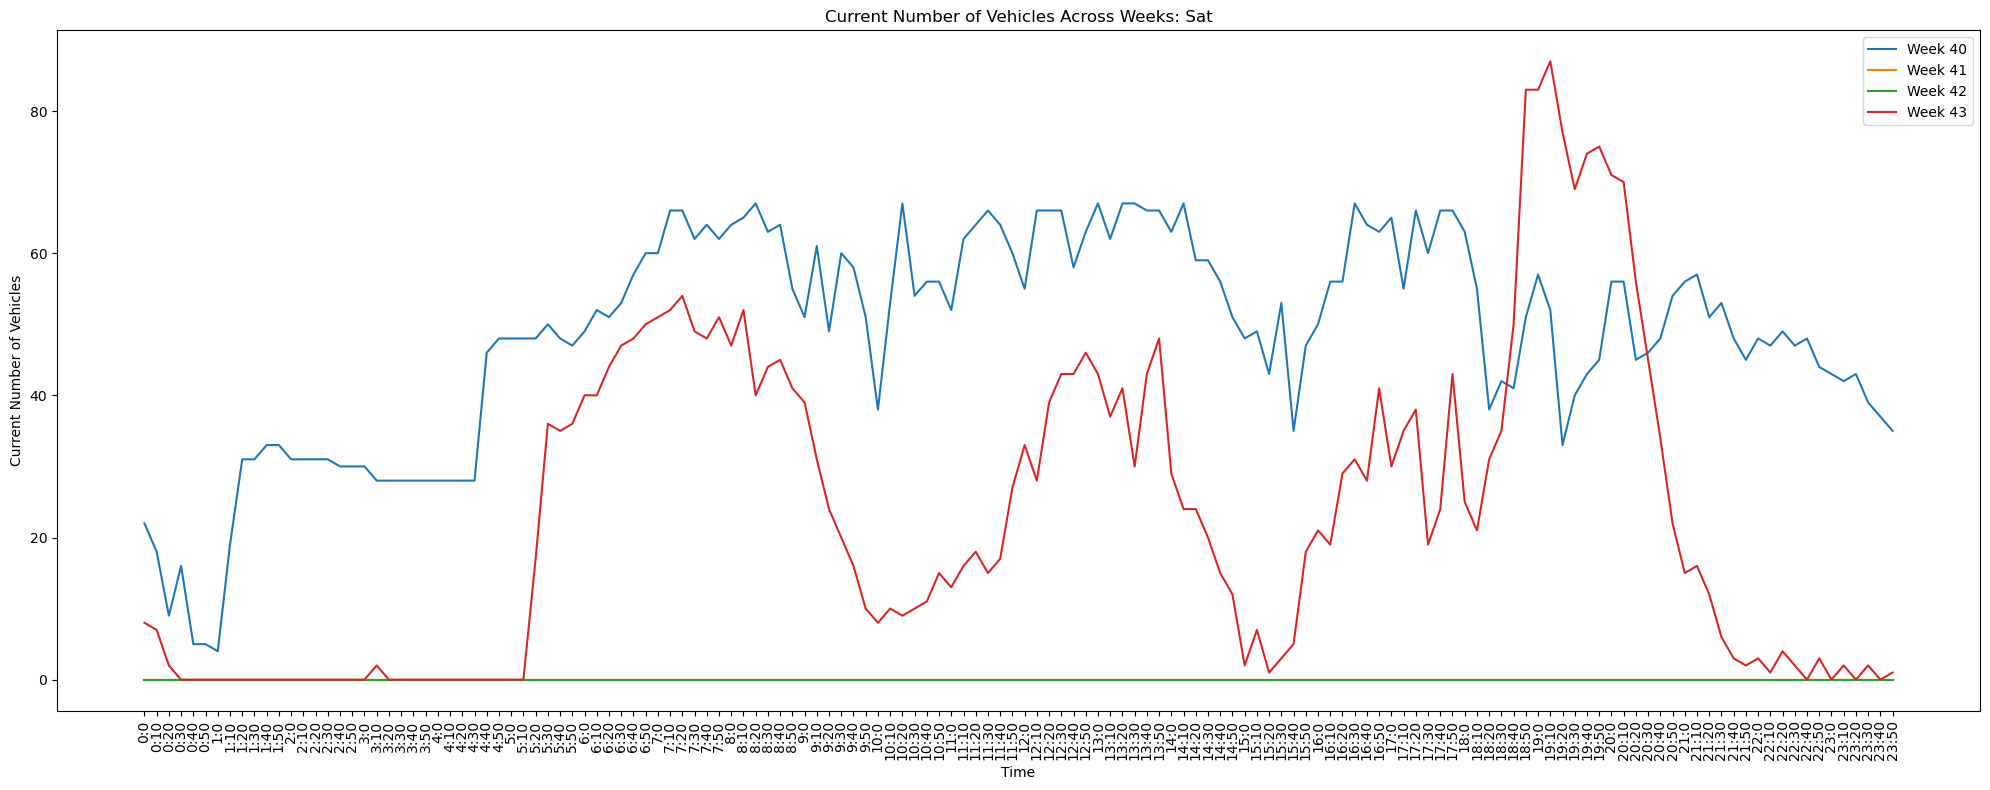

In [155]:
import matplotlib.pyplot as plt

weekday = 'Sat'

weeks = ['40', '41', '42', '43']
filtered_data = picture[picture['第幾周'].isin(weeks)]
filtered_data = filtered_data[filtered_data['星期']==weekday]

# Plotting
plt.figure(figsize=(20, 8))
for week in weeks:
    weekly_data = filtered_data[filtered_data['第幾周'] == week]
    plt.plot(weekly_data['day_datetime'], weekly_data['目前車輛數量'], label=f'Week {week}')

plt.xlabel('Time')
plt.ylabel('Current Number of Vehicles')
plt.title(f'Current Number of Vehicles Across Weeks: {weekday}')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

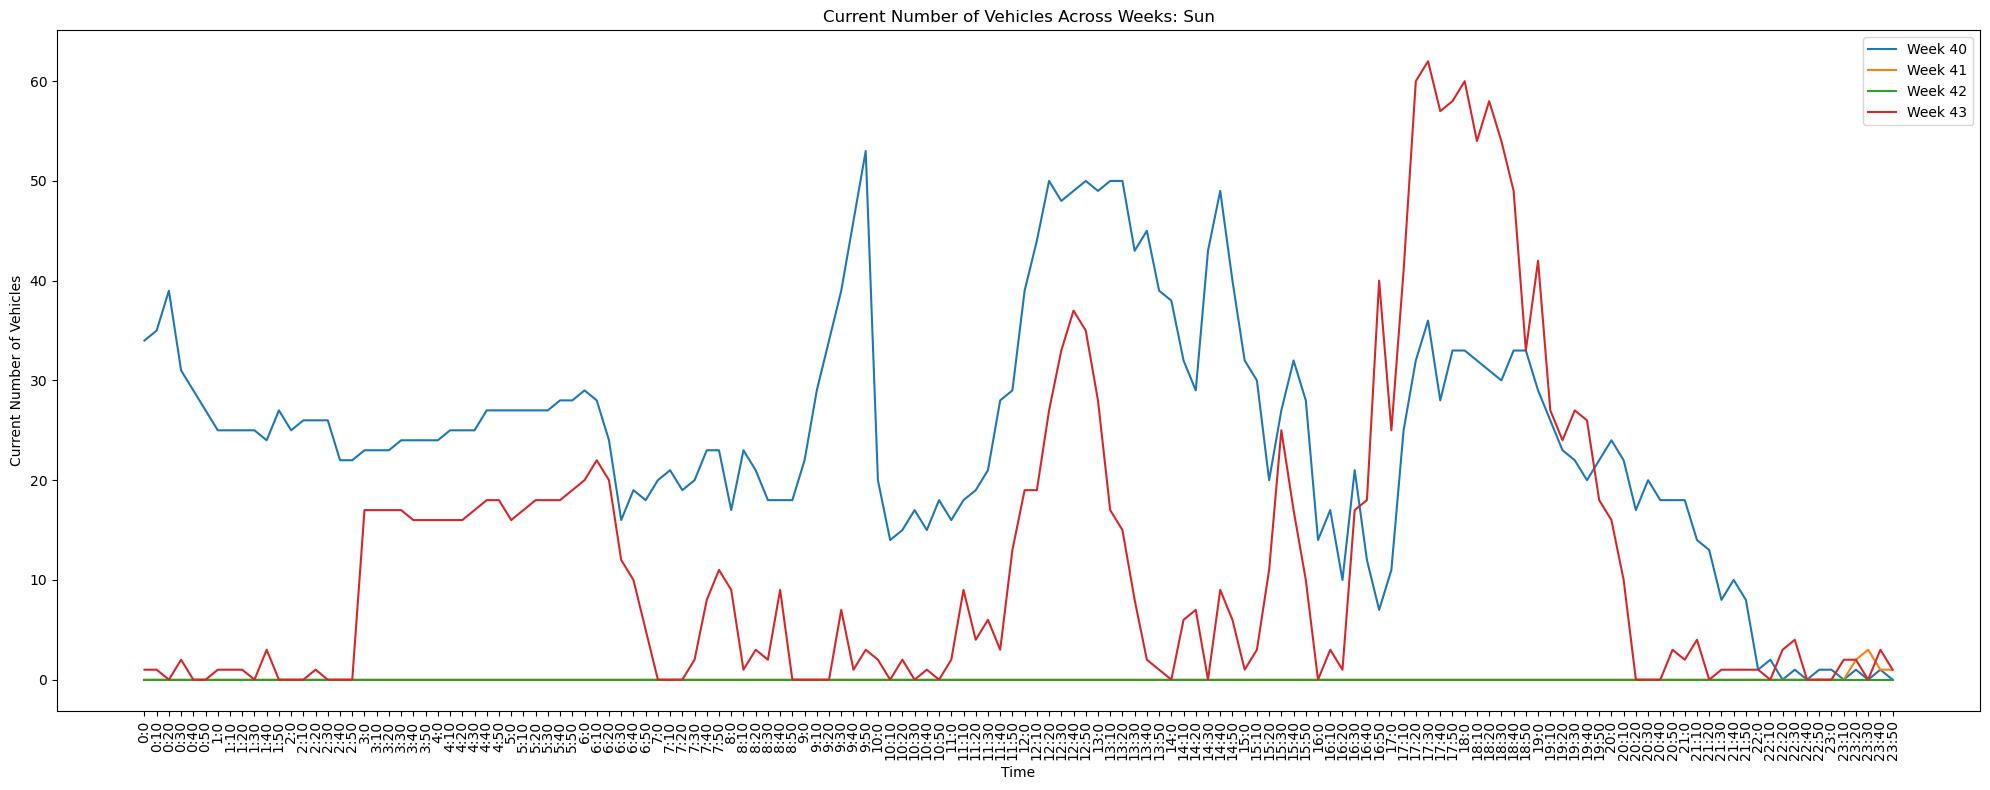

In [156]:
import matplotlib.pyplot as plt

weekday = 'Sun'

weeks = ['40', '41', '42', '43']
filtered_data = picture[picture['第幾周'].isin(weeks)]
filtered_data = filtered_data[filtered_data['星期']==weekday]

# Plotting
plt.figure(figsize=(20, 8))
for week in weeks:
    weekly_data = filtered_data[filtered_data['第幾周'] == week]
    plt.plot(weekly_data['day_datetime'], weekly_data['目前車輛數量'], label=f'Week {week}')

plt.xlabel('Time')
plt.ylabel('Current Number of Vehicles')
plt.title(f'Current Number of Vehicles Across Weeks: {weekday}')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()